In [1]:
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\Akshay\Downloads\Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [7]:
for i in df:                  # i = column name 
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        df[i].clip(upper=ul,lower=ll,inplace=True)

In [8]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [9]:
X_train=df.iloc[:,0:13]
y_train=df.iloc[:,13]

In [66]:
y_train.shape

(124, 1)

Q1 Compute and plot those feature which are related to each other?

In [10]:
Correlation = X_train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.5 else '')

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720
Malic_Acid,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173
Ash,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676
Ash_Alcanity,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700
Magnesium,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557
Total_Phenols,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115
Flavanoids,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385
Proanthocyanins,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562
Color_Intensity,0.549107,0.264897,0.256799,0.009748,0.240505,-0.062101,-0.169807,0.131596,-0.032693,1.000000,-0.520416,-0.430638,0.327100


<Axes: xlabel='Flavanoids', ylabel='Total_Phenols'>

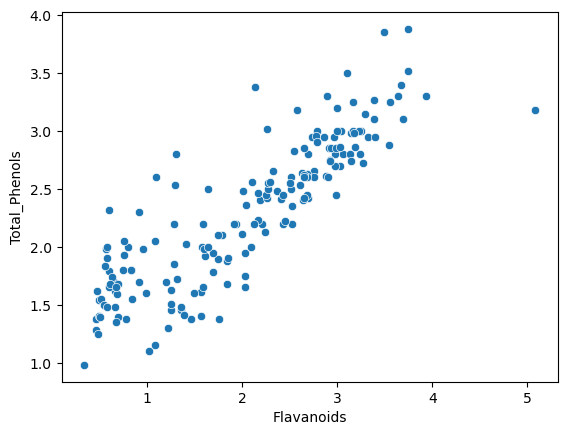

In [11]:
import seaborn as sns
sns.scatterplot(x=df.Flavanoids,y=df.Total_Phenols,data=df)

The Flavanoids increases Total_phenoids also increases

<Axes: xlabel='Flavanoids', ylabel='OD280'>

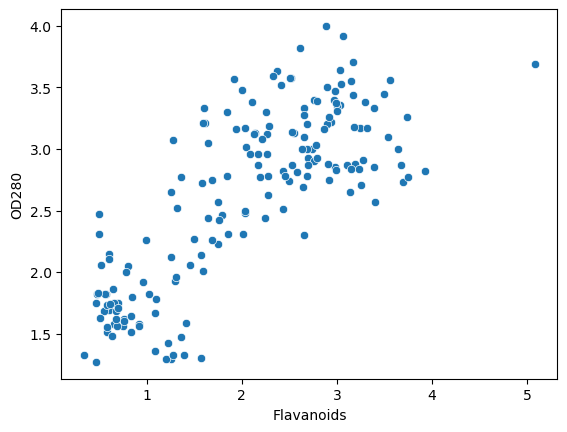

In [12]:
sns.scatterplot(x=df.Flavanoids,y=df.OD280,data=df)

<Axes: >

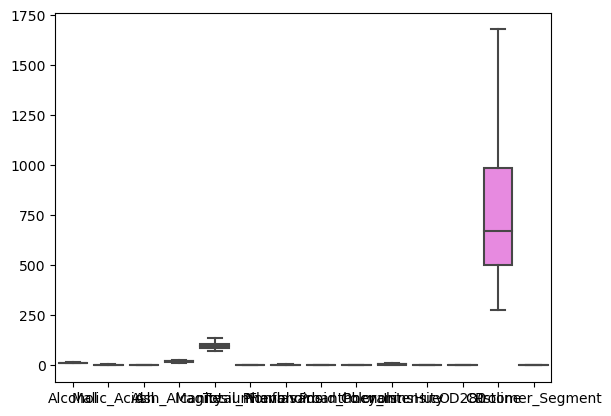

In [13]:
sns.boxplot(df)

In [14]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
  
X_train_1 = sc.fit_transform(X_train)

In [15]:
X_train_1

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  0.36660959,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.53221115,
        -1.42894777, -0.59516041]])

Q.2 What are the optimum number of principal components in PCA?	[30]

In [16]:
from sklearn.decomposition import PCA 
model = PCA(n_components = 5)
principalComponents= model.fit(X_train_1)

In [17]:
import numpy as np
pc=list(np.round(principalComponents.explained_variance_,2)) 
pc

[4.77, 2.56, 1.43, 0.92, 0.82]

Optimum value of PCA is 3

In [25]:
from sklearn.decomposition import PCA 
model = PCA(n_components = 3) # we are specifying we want 3 PCA
principalComponents= model.fit(X_train_1)

In [26]:
list(np.round(principalComponents.explained_variance_ratio_,2))

[0.36, 0.2, 0.11]

In [27]:
0.36+ 0.2+0.11

0.67

In [28]:
principalComponents.components_ 

array([[ 0.14638695, -0.24575619, -0.00357256, -0.24470276,  0.14087111,
         0.39339196,  0.42172715, -0.29683634,  0.3161246 , -0.08589806,
         0.29661931,  0.37445501,  0.28670932],
       [-0.47640599, -0.22659937, -0.31870602,  0.01442372, -0.32548413,
        -0.05970156,  0.00642568, -0.02645156, -0.03046924, -0.52512375,
         0.2734417 ,  0.16621634, -0.36136098],
       [-0.20200334,  0.08529267,  0.62917149,  0.60759082,  0.13469654,
         0.14999765,  0.14919738,  0.17278943,  0.1437554 , -0.1509434 ,
         0.088899  ,  0.16637909, -0.12289582]])

In [29]:
transformed_data = principalComponents.fit_transform(X_train_1)
transformed_data

array([[ 3.35814747e+00, -1.52022185e+00, -1.26374924e-01],
       [ 2.22921481e+00,  3.33261369e-01, -2.04283756e+00],
       [ 2.54005743e+00, -1.03695315e+00,  1.01884481e+00],
       [ 3.78112387e+00, -2.78256636e+00, -1.49224187e-01],
       [ 1.01687180e+00, -9.55225073e-01,  2.11316944e+00],
       [ 3.08026004e+00, -2.15271868e+00, -6.01559098e-01],
       [ 2.47175534e+00, -1.15588494e+00, -9.58401105e-01],
       [ 2.07139203e+00, -1.69122109e+00,  2.11298994e-01],
       [ 2.54045510e+00, -8.83884920e-01, -1.77881618e+00],
       [ 2.77052130e+00, -7.74653432e-01, -9.99870293e-01],
       [ 3.50454254e+00, -1.29825486e+00, -4.07371706e-01],
       [ 1.76782977e+00, -5.93348710e-01, -1.18098102e+00],
       [ 2.12641571e+00, -6.40665953e-01, -8.58112765e-01],
       [ 3.50743925e+00, -1.07718241e+00, -1.19594047e+00],
       [ 4.36509305e+00, -2.08205163e+00, -1.26244228e+00],
       [ 2.31969491e+00, -1.73051508e+00,  2.68412244e-01],
       [ 2.19278384e+00, -2.39898401e+00

In [30]:
print("original shape:   ", X_train_1.shape)
print("transformed shape:", transformed_data.shape)

original shape:    (178, 13)
transformed shape: (178, 3)


In [31]:
principalDf = pd.DataFrame(data = transformed_data
             , columns = ['Data PC1', 'Data PC2','Data PC3'])
principalDf.head()

,Data PC1,Data PC2,Data PC3
0,3.358147,-1.520222,-0.126375
1,2.229215,0.333261,-2.042838
2,2.540057,-1.036953,1.018845
3,3.781124,-2.782566,-0.149224
4,1.016872,-0.955225,2.113169


In [32]:
Correlation=round(principalDf.corr(),3)
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.5 else '')

,Data PC1,Data PC2,Data PC3
Data PC1,1.000000,0.000000,-0.000000
Data PC2,0.000000,1.000000,-0.000000
Data PC3,-0.000000,-0.000000,1.000000


In [33]:
X_train.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [34]:
numeric_predictors_1=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
scaled_train=pd.DataFrame(X_train_1,columns=numeric_predictors_1)
scaled_train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


In [35]:
final_data = pd.concat([scaled_train,principalDf],axis=1)
final_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Data PC1,Data PC2,Data PC3
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009,3.358147,-1.520222,-0.126375
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242,2.229215,0.333261,-2.042838
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148,2.540057,-1.036953,1.018845
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574,3.781124,-2.782566,-0.149224
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874,1.016872,-0.955225,2.113169


In [36]:
Correlation_Matrix=pd.DataFrame(round(final_data.corr(),3))*100
Correlation_Matrix=abs(Correlation_Matrix.iloc[0:13,13:16])
Correlation_Matrix.style.applymap(lambda x: 'background-color : yellow' if x > 50 else '')

,Data PC1,Data PC2,Data PC3
Alcohol,31.900000,76.100000,24.100000
Malic_Acid,53.500000,36.200000,10.200000
Ash,0.800000,50.900000,74.900000
Ash_Alcanity,53.300000,2.300000,72.400000
Magnesium,30.700000,52.000000,16.000000
Total_Phenols,85.700000,9.500000,17.900000
Flavanoids,91.800000,1.000000,17.800000
Nonflavanoid_Phenols,64.600000,4.200000,20.600000
Proanthocyanins,68.800000,4.900000,17.100000
Color_Intensity,18.700000,83.800000,18.000000


* Data PC1 ( Malic_Acid,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Hue,OD280)
* Data PC2 ( Alcohol,Magnesium,Color_Intensit,Proline)
* Data PC3 ( Ash,Ash_Alcanity)

In [38]:
df1=pd.concat([principalDf,y_train],axis=1)
df1

,Data PC1,Data PC2,Data PC3,Customer_Segment
0,3.358147,-1.520222,-0.126375,1
1,2.229215,0.333261,-2.042838,1
2,2.540057,-1.036953,1.018845,1
3,3.781124,-2.782566,-0.149224,1
4,1.016872,-0.955225,2.113169,1
...,...,...,...,...
173,-3.311751,-2.173369,-0.383365,3
174,-2.612425,-1.797712,0.210332,3
175,-2.671169,-2.865301,-0.975126,3
176,-2.371603,-2.393808,-0.561485,3


Q 3 Build a Decision Tree Classifier and comment about its accuracy.

In [39]:
def p1(df1) :
    if df1["Data PC1"] <= -2 :
        return "-4_-2"
    elif (df1["Data PC1"]>-2) & (df1["Data PC1"] <= 2 ):
        return "-2_2"
    elif (df1["Data PC1"]>2) & (df1["Data PC1"] <= 4) :
        return "2_4"
    
df1["Data PC1"] = df1.apply(lambda x :p1(x),axis = 1)

In [40]:
def p2(df1) :
    if df1["Data PC2"] <= -2 :
        return "-4_-2"
    elif (df1["Data PC2"]>-2) & (df1["Data PC2"] <= 2 ):
        return "-2_2"
    elif (df1["Data PC2"]>2) & (df1["Data PC2"] <= 4) :
        return "2_4"
    
df1["Data PC2"] = df1.apply(lambda x :p2(x),axis = 1) 

In [42]:
def p3(df1) :
    if df1["Data PC3"] <= -2 :
        return "-4_-2"
    elif (df1["Data PC3"]>-2) & (df1["Data PC3"] <= 2 ):
        return "-2_2"
    elif (df1["Data PC3"]>2) & (df1["Data PC3"] <= 4) :
        return "2_4"
    
df1["Data PC3"] = df1.apply(lambda x :p3(x),axis = 1) 

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Data PC1          177 non-null    object
 1   Data PC2          178 non-null    object
 2   Data PC3          177 non-null    object
 3   Customer_Segment  178 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.7+ KB


In [44]:
df1

,Data PC1,Data PC2,Data PC3,Customer_Segment
0,2_4,-2_2,-2_2,1
1,2_4,-2_2,-4_-2,1
2,2_4,-2_2,-2_2,1
3,2_4,-4_-2,-2_2,1
4,-2_2,-2_2,2_4,1
...,...,...,...,...
173,-4_-2,-4_-2,-2_2,3
174,-4_-2,-2_2,-2_2,3
175,-4_-2,-4_-2,-2_2,3
176,-4_-2,-4_-2,-2_2,3


In [46]:
Qualitative_Variable = df1[df1.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head()

,Data PC1,Data PC2,Data PC3
0,2_4,-2_2,-2_2
1,2_4,-2_2,-4_-2
2,2_4,-2_2,-2_2
3,2_4,-4_-2,-2_2
4,-2_2,-2_2,2_4


In [47]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Data PC1,Data PC2,Data PC3
0,2,0,0
1,2,0,1
2,2,0,0
3,2,1,0
4,0,0,2


In [48]:
Quantitative_Variable = df1[df1.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,Customer_Segment
0,1
1,1
2,1


In [49]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Data PC1,Data PC2,Data PC3,Customer_Segment
0,2,0,0,1
1,2,0,1,1
2,2,0,0,1
3,2,1,0,1
4,0,0,2,1


In [50]:
# Data partitioning
from sklearn.model_selection import train_test_split
x = Final_combined.drop(['Customer_Segment'],axis=1)
y = Final_combined[['Customer_Segment']]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=20)

In [51]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,Customer_Segment,Data PC1,Data PC2,Data PC3
175,3,1,1,0
143,3,1,0,0
146,3,1,0,0
129,2,0,0,0
37,1,0,0,0


In [53]:
independent_variable = list(train.columns[1:])
independent_variable

['Data PC1', 'Data PC2', 'Data PC3']

In [54]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion= 'gini',#splitter
                                 min_samples_leaf=20,
                                 ## child
                                 min_samples_split=75, #parent 
                                 max_depth=5)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=75)

In [55]:
train['Predicted'] = dt.predict(X_train)
train.head()

,Customer_Segment,Data PC1,Data PC2,Data PC3,Predicted
175,3,1,1,0,3
143,3,1,0,0,3
146,3,1,0,0,3
129,2,0,0,0,2
37,1,0,0,0,2


In [56]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Customer_Segment'])
print(matrix)

[[29  4  0]
 [15 38  3]
 [ 0  2 33]]


In [57]:
from sklearn.metrics import classification_report
print(classification_report(train['Customer_Segment'], train['Predicted']))

              precision    recall  f1-score   support

           1       0.88      0.66      0.75        44
           2       0.68      0.86      0.76        44
           3       0.94      0.92      0.93        36

    accuracy                           0.81       124
   macro avg       0.83      0.81      0.81       124
weighted avg       0.83      0.81      0.81       124



In [58]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Data PC1,Data PC2,Data PC3,Customer_Segment
111,0,0,0,2
177,1,1,0,3
46,2,0,0,1
112,0,0,2,2
91,0,0,0,2


In [59]:
test['Predicted'] = dt.predict(X_test)
test.head()

,Data PC1,Data PC2,Data PC3,Customer_Segment,Predicted
111,0,0,0,2,2
177,1,1,0,3,3
46,2,0,0,1,1
112,0,0,2,2,2
91,0,0,0,2,2


In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Customer_Segment'])
print(confusion_matrix)

[[11  1  0]
 [ 4 26  1]
 [ 0  0 11]]


In [61]:
from sklearn.metrics import classification_report
print(classification_report(test['Customer_Segment'], test['Predicted']))

              precision    recall  f1-score   support

           1       0.92      0.73      0.81        15
           2       0.84      0.96      0.90        27
           3       1.00      0.92      0.96        12

    accuracy                           0.89        54
   macro avg       0.92      0.87      0.89        54
weighted avg       0.90      0.89      0.89        54



* Train data accuracy 81%  
* Test data accuracy 89%

Q 4 Perform  a K-means Clustering algorithm on above dataset 

* Using Elbow chart 
* Using Silhouette Chart 

Exclude variable :- Customer Segment

In [67]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [69]:
orginal = df.copy()

In [70]:
df=df.drop(['Customer_Segment'],axis=1)

In [71]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [72]:
samples = df.values
samples

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

Elbow to find K value

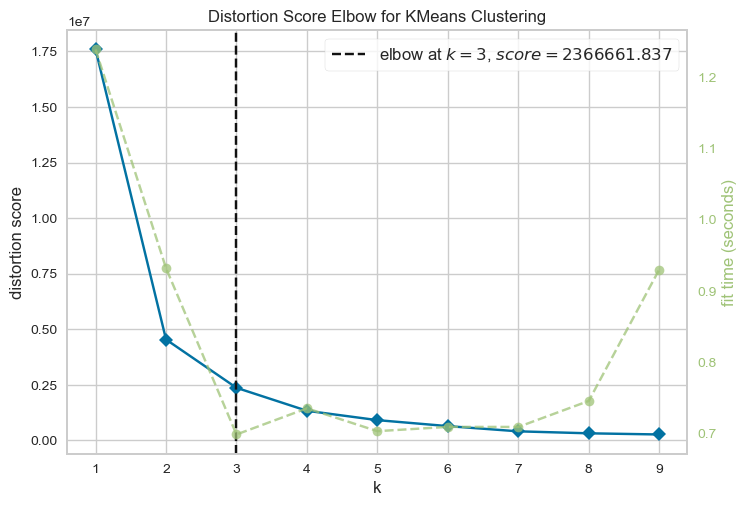

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10))
visualizer.fit(samples)
visualizer.show()

In [74]:
model2 = KMeans(n_clusters=3,max_iter=100,random_state=42)

In [75]:
df_clone['Cluster_Made'] = model2.fit_predict(samples)
df_clone.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Cluster_Made
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2


Final Cluster Centorids

In [77]:
model2.cluster_centers_

array([[1.25166667e+01, 2.48398551e+00, 2.29112319e+00, 2.08094203e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.44347826e+00, 4.08507245e+00, 9.39945652e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.69797872e+01,
        1.05436170e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.29298387e+01, 2.49842742e+00, 2.40578629e+00, 1.98903226e+01,
        1.02911290e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.49887097e+00, 5.59516129e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02]])

In [80]:
df_clone.Cluster_Made.value_counts(ascending=False)

0    69
2    62
1    47
Name: Cluster_Made, dtype: int64

Silhouette Chart

In [81]:
import sklearn.metrics as metrics

In [82]:
import sklearn.cluster
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit_predict(df)
score = sklearn.metrics.silhouette_score(df, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.572


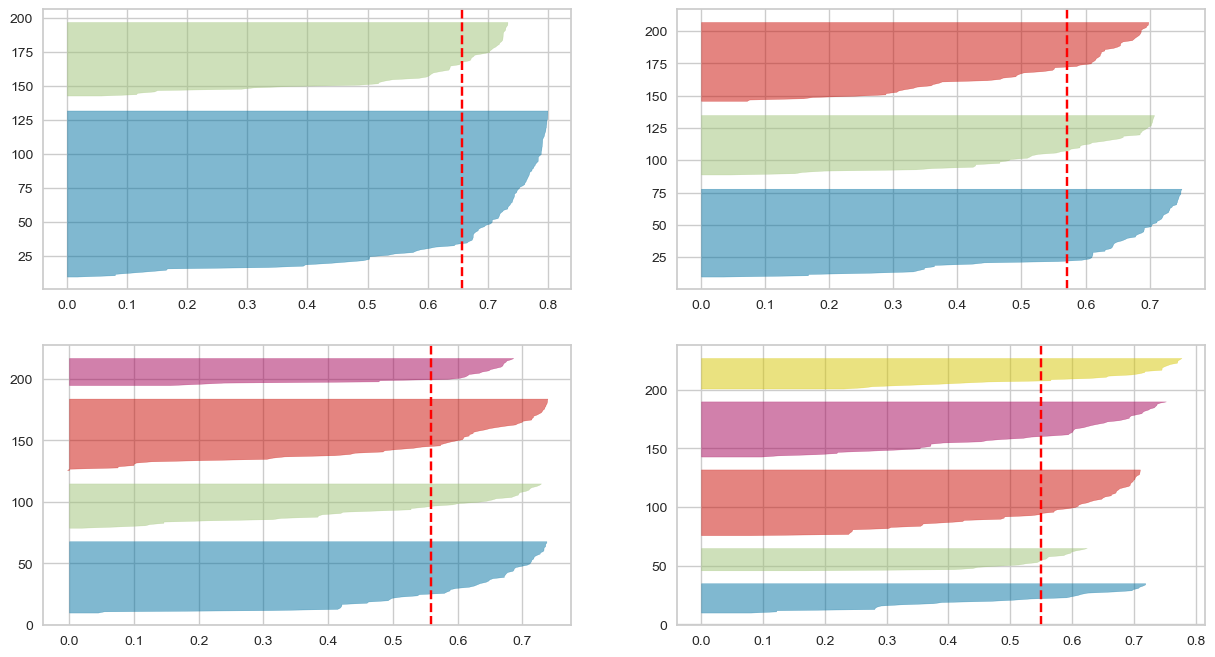

In [83]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)